# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress



# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

c_id= []
name = []
country = []
long = []
latt = []
cloudiness= []
date= []
humidity= []
max_temp = []
wind_speed = []
weather_json = {}

try:
    url = "http://api.openweathermap.org/data/2.5/weather?"

    for city in cities:
        query_url = url + "&q=" + city + "&APPID=" + weather_api_key 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        c_id.append(str(weather_json['id']))
        name.append(str(weather_json['name']))
        country.append(str(weather_json['sys']['country']))
        long.append(float(round(weather_json['coord']['lon'],2)))
        latt.append(float(round(weather_json['coord']['lat'],2)))
        cloudiness.append(float(weather_json['clouds']['all']))
        date.append(str(datetime.datetime.fromtimestamp(weather_json['dt']).strftime("%A, %d. %B %Y %I:%M%p")))
        humidity.append(float(weather_json['main']['humidity']))
        max_temp.append((1.8*(weather_json['main']['temp_max'] - 273) + 32))
        wind_speed.append(float(weather_json['wind']['speed']))
        
        
        

#         pp.pprint(weather_json)
except KeyError:
    
    pass

# print(query_url)

# api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1111111111

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
weather_list_df = pd.DataFrame({'City ID':c_id,'City':name,'Country':country,'Lng':long,'Lat':latt, 'Cloudiness':cloudiness, 'Date': date, 'Humidity': humidity, 'Max Temp':max_temp, 'Wind Speed':wind_speed})
weather_list_df.to_csv(output_data_file,index = False)
weather_list_df.head(5)


,City ID,City,Country,Lng,Lat,Cloudiness,Date,Humidity,Max Temp,Wind Speed
0,2069194,Jamestown,AU,138.60,-33.21,14.0,"Friday, 15. November 2019 11:36AM",95.0,46.238,2.12
1,5106834,Albany,US,-73.75,42.65,20.0,"Friday, 15. November 2019 11:35AM",45.0,45.266,4.60
2,1039536,Maxixe,MZ,35.35,-23.86,40.0,"Friday, 15. November 2019 11:36AM",65.0,80.870,4.10
3,3652764,Puerto Ayora,EC,-90.35,-0.74,75.0,"Friday, 15. November 2019 11:36AM",65.0,77.270,7.20
4,3366880,Hermanus,ZA,19.24,-34.42,2.0,"Friday, 15. November 2019 11:36AM",79.0,72.266,1.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

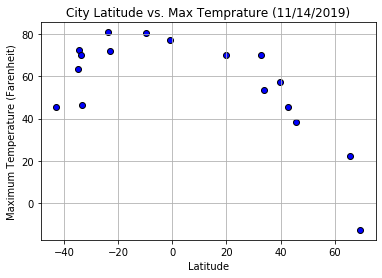

In [46]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,120)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temprature (11/14/2019)")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_MT.png')

#### Latitude vs. Humidity Plot

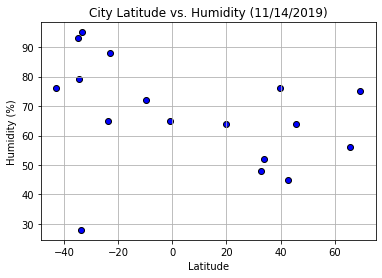

In [47]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,300)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (11/14/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_Hum.png')

#### Latitude vs. Cloudiness Plot

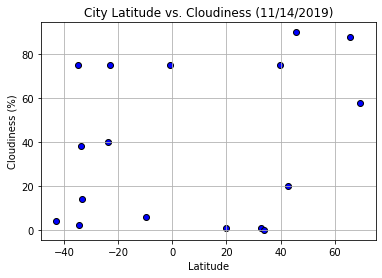

In [48]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,100)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (11/14/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_Cl.png')

#### Latitude vs. Wind Speed Plot

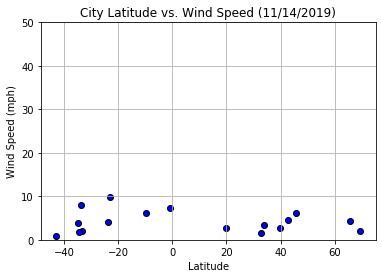

In [49]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (11/14/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_W.png')

## Linear Regression

In [50]:
# OPTIONAL: Create a function to create Linear Regression plots


In [51]:
# Create Northern and Southern Hemisphere DataFrames
northern_x_v = weather_list_df[weather_list_df['Lat']<1]
southern_x_v = weather_list_df[weather_list_df['Lat']>1]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6889603883608543


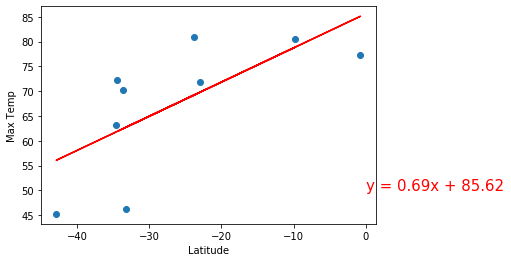

<Figure size 432x288 with 0 Axes>

In [52]:
x_values=northern_x_v['Lat']

y_values = northern_x_v['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_MT.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.930949535485368


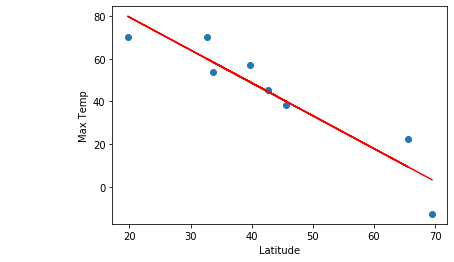

<Figure size 432x288 with 0 Axes>

In [53]:

x_values =southern_x_v['Lat']

y_values = southern_x_v['Max Temp']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_MT.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.12690855165622422


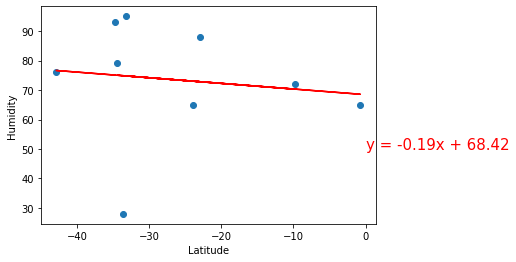

<Figure size 432x288 with 0 Axes>

In [54]:

x_values =northern_x_v['Lat']

y_values = northern_x_v['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_Hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27289585005175737


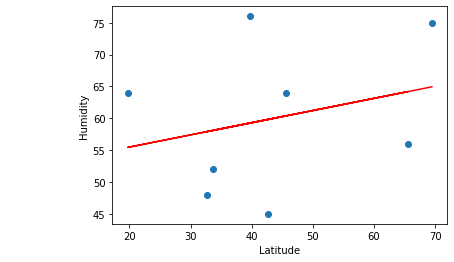

<Figure size 432x288 with 0 Axes>

In [55]:

x_values =southern_x_v['Lat']

y_values = southern_x_v['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_Hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.36564981373547023


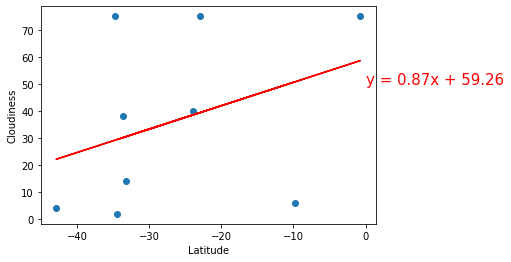

<Figure size 432x288 with 0 Axes>

In [56]:

x_values =northern_x_v['Lat']

y_values = northern_x_v['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_Cl.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.6898081627695513


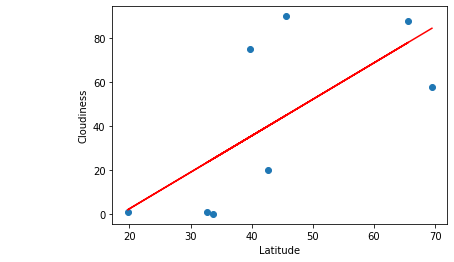

<Figure size 432x288 with 0 Axes>

In [57]:

x_values =southern_x_v['Lat']

y_values = southern_x_v['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_Cl.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.5774703609251413


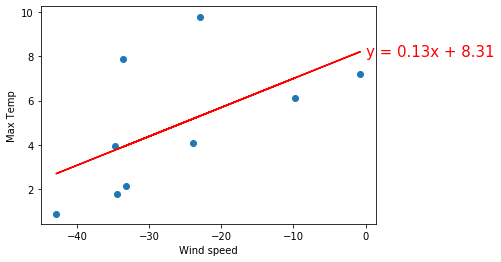

<Figure size 432x288 with 0 Axes>

In [58]:

x_values = northern_x_v['Lat']

y_values = northern_x_v['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,8),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_W.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18368089411999994


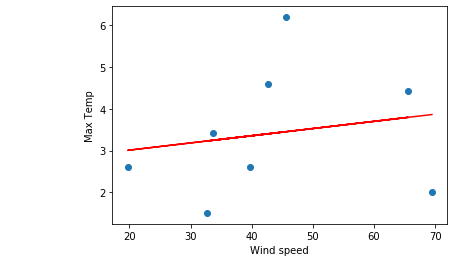

<Figure size 432x288 with 0 Axes>

In [59]:

x_values = southern_x_v['Lat']

y_values = southern_x_v['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_W.png')